C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


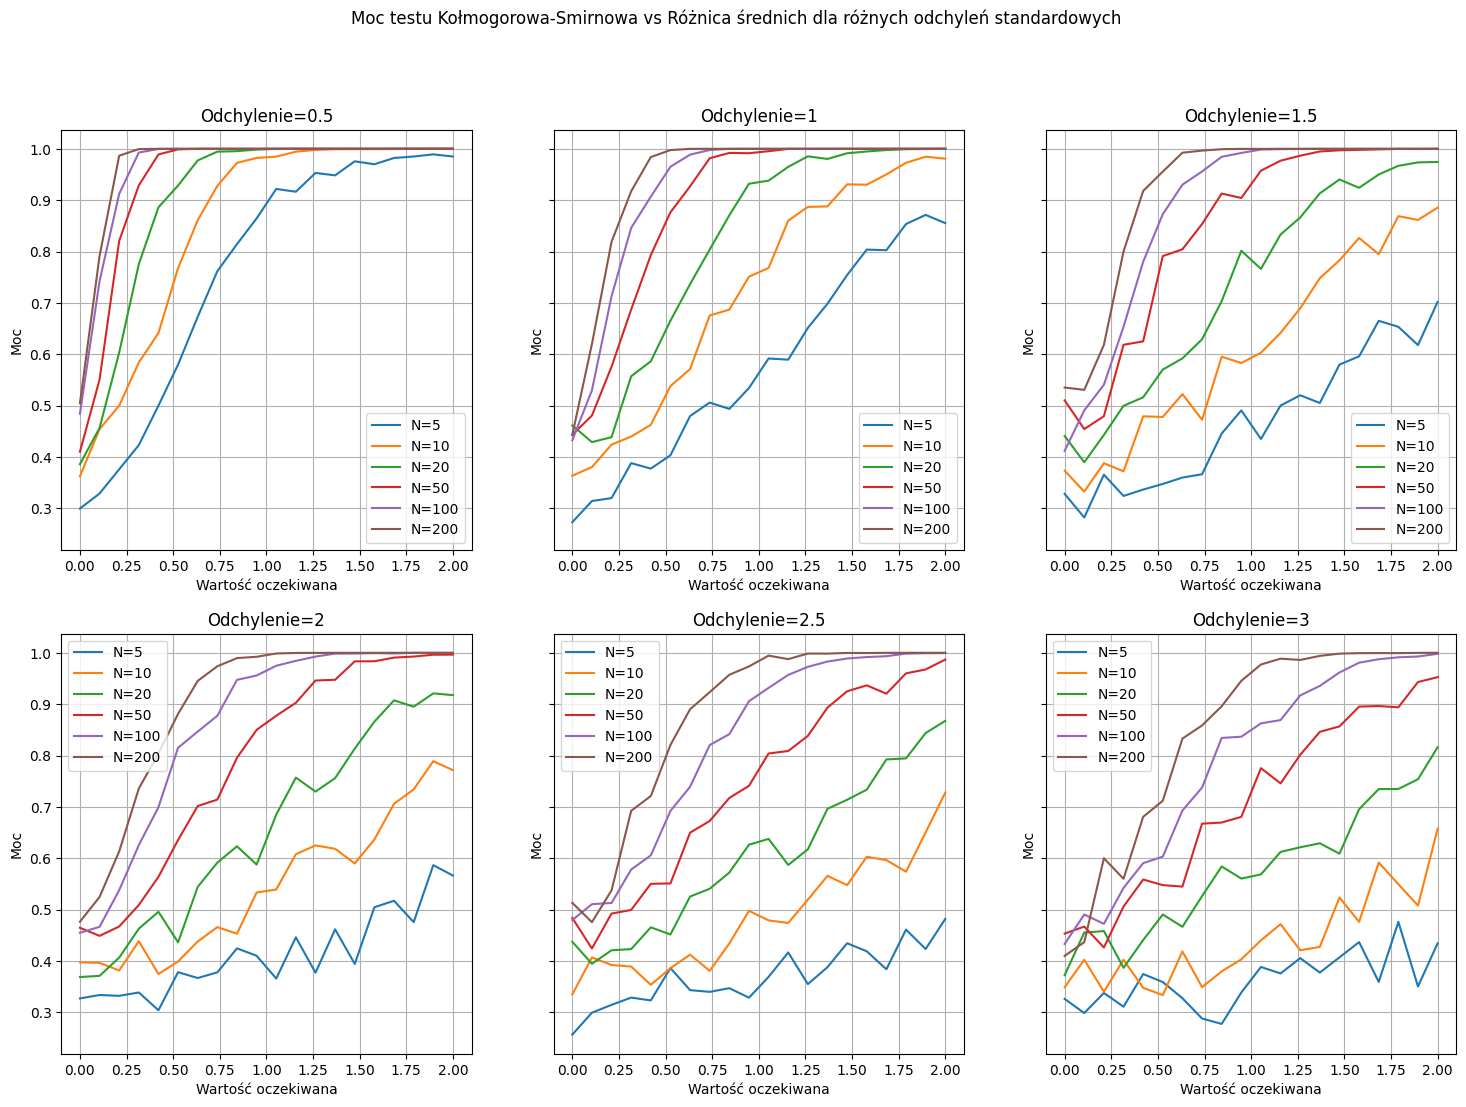

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

def generuj_probki_normalne(srednia, odchylenie_std, rozmiar):
    """
    Generuj próbki z rozkładu normalnego o zadanej średniej i odchyleniu standardowym.
    
    Args:
    srednia (float): Średnia rozkładu normalnego.
    odchylenie_std (float): Odchylenie standardowe rozkładu normalnego.
    rozmiar (int): Liczba próbek do wygenerowania.
    
    Returns:
    numpy.ndarray: Tablica wygenerowanych próbek.
    """
    return np.random.normal(srednia, odchylenie_std, rozmiar)

def oblicz_moc_testu_ks(sample1, sample2, alpha=0.05):
    """
    Oblicz moc testu Kołmogorowa-Smirnowa pomiędzy dwoma próbkami.
    
    Args:
    sample1 (array-like): Dane pierwszej próbki.
    sample2 (array-like): Dane drugiej próbki.
    alpha (float): Poziom istotności testu.
    
    Returns:
    float: Moc testu Kołmogorowa-Smirnowa.
    """
    _, p_value = kstest(sample1, sample2)
    return 1 - p_value

def symuluj_moc_testu_vs_roznica_srednich(roznica_srednich, odchylenie_std, rozmiary_probek, num_symulacji):
    """
    Symuluj moc testu Kołmogorowa-Smirnowa dla różnych różnic średnich i standardowych odchyleń.
    
    Args:
    roznica_srednich (float): Różnica w średnich między dwoma próbkami.
    odchylenie_std (list): Lista różnych odchyleń standardowych do rozważenia.
    rozmiary_probek (list): Lista różnych rozmiarów próbek do rozważenia.
    num_symulacji (int): Liczba symulacji do wykonania.
    
    Returns:
    numpy.ndarray: Moc testu dla każdej różnicy średnich i odchylenia standardowego.
    """
    wyniki_mocy = np.zeros((len(odchylenie_std), len(roznica_srednich), len(rozmiary_probek)))
    
    for i, odchylenie in enumerate(odchylenie_std):
        for j, roznica in enumerate(roznica_srednich):
            for k, rozmiar in enumerate(rozmiary_probek):
                moce = []
                for _ in range(num_symulacji):
                    próbka1 = generuj_probki_normalne(0, odchylenie, rozmiar)
                    próbka2 = generuj_probki_normalne(roznica, odchylenie, rozmiar)
                    moc = oblicz_moc_testu_ks(próbka1, próbka2)
                    moce.append(moc)
                wyniki_mocy[i, j, k] = np.mean(moce)
    
    return wyniki_mocy

# Parametry
roznica_srednich = np.linspace(0, 2, 20)  # Różne różnice średnich do rozważenia
odchylenie_std = [0.5, 1, 1.5, 2, 2.5, 3]  # Różne odchylenia standardowe dla obu próbek
rozmiary_probek = [5, 10, 20, 50, 100, 200]  # Różne rozmiary próbek do rozważenia
num_symulacji = 100  # Liczba symulacji

# Symuluj moc testu vs. różnica średnich dla różnych odchyleń standardowych
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

for i, odchylenie in enumerate(odchylenie_std):
    row = i // 3
    col = i % 3
    wyniki_mocy = symuluj_moc_testu_vs_roznica_srednich(roznica_srednich, [odchylenie], rozmiary_probek, num_symulacji)
    for j, rozmiar in enumerate(rozmiary_probek):
        axs[row, col].plot(roznica_srednich, wyniki_mocy[0, :, j], label=f'N={rozmiar}')
    axs[row, col].set_title(f'Odchylenie={odchylenie}')
    axs[row, col].set_xlabel('Wartość oczekiwana')
    axs[row, col].set_ylabel('Moc')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.suptitle('Moc testu Kołmogorowa-Smirnowa vs Różnica średnich dla różnych odchyleń standardowych')
plt.show()


W przeprowadzonym badaniu symulowano testy Kołmogorowa-Smirnowa na danych generowanych z rozkładu normalnego. Celem było zbadanie wpływu różnicy średnich, odchylenia standardowego i rozmiaru próbki na moc testu.

Parametry symulacji były następujące:
- Liczba symulacji: **100**
- Różnica średnich: od **0** do **2** (20 równo rozmieszczonych wartości)
- Odchylenie standardowe: **0.5**, **1**, **1.5**, **2**, **2.5**, **3**
- Rozmiar próbki: **5**, **10**, **20**, **50**, **100**, **200**

Dla każdej kombinacji parametrów różnicy średnich, odchylenia standardowego i rozmiaru próbki, przeprowadzono **100** testów Kołmogorowa-Smirnowa. Następnie obliczono moc każdego testu dla każdej kombinacji i przedstawiono wyniki na sześciu wykresach (po jednym dla każdego odchylenia standardowego).

Na podstawie wykresów można zauważyć, że moc testu generalnie rośnie wraz ze wzrostem różnicy średnich i rozmiaru próbki. Może to sugerować, że zwiększenie różnicy średnich lub rozmiaru próbki prowadzi do większej mocy testu, co pozwala na lepsze wykrywanie różnic między dwoma próbkami.

Ponadto, dla danego rozmiaru próbki i różnicy średnich, moc testu nie wydaje się znacząco zmieniać wraz ze wzrostem odchylenia standardowego. Może to sugerować, że odchylenie standardowe nie ma dużego wpływu na moc testu Kołmogorowa-Smirnowa.

Wszystkie te wnioski są jednak oparte na symulacjach i mogą nie odzwierciedlać rzeczywistości w każdym przypadku. Dlatego zawsze warto przeprowadzić dodatkowe analizy i testy, aby potwierdzić te wyniki. W szczególności, warto zauważyć, że test Kołmogorowa-Smirnowa ma różne założenia i może być bardziej lub mniej odpowiedni w zależności od konkretnego zestawu danych. Dlatego zawsze warto rozważyć, który test jest najbardziej odpowiedni do danego problemu.